# Adversarial Search: Playing Connect 4

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]

## Instructions

Total Points: Undegraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

In [400]:
# Your code/answer goes here.

How big is the state space? Give an estimate and explain it.

In [401]:
# Your code/ answer goes here.

How big is the game tree that minimax search will go through? Give an estimate and explain it.

In [402]:
# Your code/ answer goes here.

## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [403]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

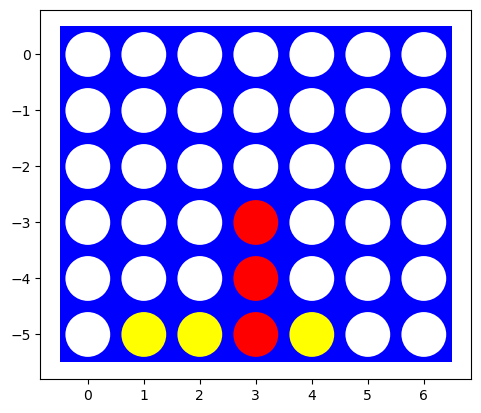

In [404]:
# Visualization code by Randolph Rankin

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(s)`.
* The transition model `result(s, a)`.
* Check for terminal states `terminal(s)`.
* The utility function `utility(s)`.

Make sure that all these functions work with boards of different sizes (number of columns and rows).

In [405]:
# Your code/ answer goes here.

import warnings
warnings.filterwarnings('ignore')

# action function
def action(board_state):
    # initialize the list of column numbers as possible actions
    possible_actions = []

    # check if the top row is empty for every column
    for i in range(board_state.shape[1]):
        # if the top row is empty, add the column number to the list of possible actions
        if board_state[0][i] == 0:
            possible_actions.append(i)
    return possible_actions

# return the new board state after an action is taken
def results(board_state, res_action, player_token):
    # initialize the new board state
    new_board_state = board_state.copy()

    # check every row in the column action
    count_from_bottom = new_board_state.shape[0] - 1
    while count_from_bottom >= 0:
        # if the row is empty, add the player's token
        if new_board_state[count_from_bottom][res_action] == 0:
            new_board_state[count_from_bottom][res_action] = player_token
            break
        count_from_bottom -= 1

    return new_board_state


def check_connect_4(board_state):
    # check rows for connect 4s
    for i in range(board_state.shape[0]):
        for j in range(board_state.shape[1] - 3):
            if board_state[i][j] != 0 and board_state[i][j] == board_state[i][j + 1] == board_state[i][j + 2] == board_state[i][j + 3]:
                if board_state[i][j] == 1:
                    return 1
                if board_state[i][j] == -1:
                    return -1

    # check columns for connect 4s
    for i in range(board_state.shape[0] - 3):
        for j in range(board_state.shape[1]):
            if board_state[i][j] != 0 and board_state[i][j] == board_state[i + 1][j] == board_state[i + 2][j] == board_state[i + 3][j]:
                if board_state[i][j] == 1:
                    return 1
                if board_state[i][j] == -1:
                    return -1

    # check diagonals for connect down and right 4s
    for i in range(board_state.shape[0] - 3):
        for j in range(board_state.shape[1] - 3):
            if board_state[i][j] != 0 and board_state[i][j] == board_state[i + 1][j + 1] == board_state[i + 2][j + 2] == board_state[i + 3][j + 3]:
                if board_state[i][j] == 1:
                    return 1
                if board_state[i][j] == -1:
                    return -1

     # check diagonals for connect up and left 4s
    for i in range(board_state.shape[0] - 3):
        j = board_state.shape[1] - 1
        while j >= 2:
            if board_state[i][j] != 0 and board_state[i][j] == board_state[i + 1][j - 1] == board_state[i + 2][j - 2] == board_state[i + 3][j - 3]:
                if board_state[i][j] == 1:
                    return 1
                if board_state[i][j] == -1:
                    return -1
            j -= 1

    # if no connect 4 is found, return 0
    return 0

def check_connect_3(board_state):
    total_3s = 0
    total_for_plr = 0
    total_for_opp = 0

    # check rows for connect 3s
    for i in range(board_state.shape[0]):
        for j in range(board_state.shape[1] - 2):
            if board_state[i][j] != 0 and board_state[i][j] == board_state[i][j + 1] == board_state[i][j + 2]:
                if board_state[i][j] == 1:
                    total_3s += 1
                    total_for_plr += 1
                if board_state[i][j] == -1:
                    total_3s += 1
                    total_for_opp += 1

    # check columns for connect 3s
    for i in range(board_state.shape[0] - 2):
        for j in range(board_state.shape[1]):
            if board_state[i][j] != 0 and board_state[i][j] == board_state[i + 1][j] == board_state[i + 2][j]:
                if board_state[i][j] == 1:
                    total_3s += 1
                    total_for_plr += 1
                if board_state[i][j] == -1:
                    total_3s += 1
                    total_for_opp += 1

    # check diagonals for connect down and right 3s
    for i in range(board_state.shape[0] - 2):
        for j in range(board_state.shape[1] - 2):
            if board_state[i][j] != 0 and board_state[i][j] == board_state[i + 1][j + 1] == board_state[i + 2][j + 2]:
                if board_state[i][j] == 1:
                    total_3s += 1
                    total_for_plr += 1
                if board_state[i][j] == -1:
                    total_3s += 1
                    total_for_opp += 1

     # check diagonals for connect up and left 3s
    for i in range(board_state.shape[0] - 2):
        j = board_state.shape[0] - 1
        while j >= 0:
            if board_state[i][j] != 0 and board_state[i][j] == board_state[i + 1][j - 1] == board_state[i + 2][j - 2]:
                if board_state[i][j] == 1:
                    total_3s += 1
                    total_for_plr += 1
                if board_state[i][j] == -1:
                    total_3s += 1
                    total_for_opp += 1
            j -= 1

    # if there are no connect 3s, the ratio of connect 3s is 0
    ratio_of_plr = 0
    ratio_of_opp = 0

    # if there are connect 3s, calculate the ratio of connect 3s for each player
    if total_3s > 0:
        ratio_of_plr = total_for_plr / total_3s
        ratio_of_opp = total_for_opp / total_3s

    # if no connect 4 is found, return 0
    return ratio_of_plr, ratio_of_opp

# checks if there are any connect 4s
def terminal(board_state):
    result = 0
    finished = False

    # check if anyone has currently won or if the board is in a nuetral state
    result = check_connect_4(board_state)
    if result != 0:
        finished = True

    # check if the board is full
    if np.count_nonzero(board_state) == board_state.shape[0] * board_state.shape[1]:
        finished = True
        # return 0

    if finished == False:
        return False, 0
    else:
        return True, result

# checks the utility of a board state
def utility(board_state, player):
    # check if anyone has currently won or if the board is in a nuetral state
    # result = terminal(board_state)

    # check if board is in a terminal state
    is_terminal, result = terminal(board_state)
    if is_terminal:
        return result

    # check if there are any connect 3s for the utility function
    utility = 0
    # plr_ratio, opp_ratio = check_connect_3(board_state)
    # if player == 1:
    #     utility = plr_ratio - opp_ratio
    # else:
    #     utility = opp_ratio - plr_ratio

    return utility


Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [406]:
# Your code/ answer goes here.
def random_player(board_state, player = 1):
    # return random choice from the list of possible actions
    rand_action = np.random.choice(action(board_state))
    return results(board_state, rand_action, player)

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [407]:
# Your code/ answer goes here.
import pandas as pd

def play(board, player1, player2): #pass in function for both players
    turn = 0
    cur_board = board.copy()

    # play until the someone wins or the board is full
    is_terminal, result = terminal(cur_board)

    while is_terminal == False:
        if turn % 2 == 0:
            cur_board = player1(cur_board, 1)
        else:
            cur_board = player2(cur_board, -1)
        turn += 1

        # check if the board is in a terminal state
        is_terminal, result = terminal(cur_board)

    # return the final board state
    return cur_board


df = pd.DataFrame(columns=['run_number', 'winner'])

for x in range(1000):
    myBoard = empty_board()
    myBoard = play(myBoard, random_player, random_player)
    # visualize(myBoard)
    # print("The board ended with a utility of", utility(myBoard, 1))
    df = df.append({'run_number': x, 'winner': utility(myBoard, 1)}, ignore_index=True)

In [408]:
# print(df)
# print(df[df['winner'] == 0])

# print the number of times each player won
print("Number of times each player won:")
print(df['winner'].value_counts())

Number of times each player won:
 1    585
-1    414
 0      1
Name: winner, dtype: int64


## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points]

Implement minimax search starting from a given board for specifying the player.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Important Notes:__
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The search space for a $6 \times 7$ board is large. You can experiment with smaller boards (the smallest is $4 \times 4$) and/or changing the winning rule to connect 3 instead of 4.

In [409]:
# Your code/ answer goes here.
# import math

# def minmax_search(board, player = 1):
#     # check each possible postion for a move to see if there is terminal state in any 
#     for a in action(board):
#         is_terminal, result = terminal(results(board, a, plr))
#         if is_terminal and result == plr:
#             return a

    
#     utility, next_move = max_val(board, plr)
#     return next_move

# # players best move
# def max_val(state, player = 1):

#     # returns utility and next move as none if it is at a terminal state
#     v = utility(state, player)
#     is_terminal, term_result = terminal(state)
#     if is_terminal:
#         # print("terminal min")
#         return v, None
    

#     v, move = -math.inf, None

#     # check all possible actions in the state, return move with the largest value
#     for a in action(state):
#         v2, a2 = min_val(results(state, a, player), player)
#         if v2 > v:
#             v, move = v2, a

#     # print("max", v, move)
#     return v, move


# def min_val(state, player = 1):
#     v = utility(state, player)
#     is_terminal, term_result = terminal(state)
#     if is_terminal:
#         # print("terminal min")
#         return v, None

#     v, move = +math.inf, None

#     # check all possible actions in the state, return move with the smallest value
#     for a in action(state):
#         v2, a2 = max_val(results(state, a, (player * -1)), player)
#         if v2 < v:
#             v, move = v2, a
    
#     # print("min", v, move)
#     return v, move


# def minmax_player(board, player = 1):
#     move = minmax_search(board, player)
#     visualize(results(board, move, player))
#     return results(board, move, player)


In [410]:
import math

def alpha_beta_minmax_search(board, player = 1, depth = +math.inf, ):
    global DEBUG, COUNT
    COUNT, DEBUG = 0, 0
    COUNT += 1
    plr = player

    # checks each possible column for a move to see if there is terminal state in any 
    for a in action(board):
        is_terminal, result = terminal(results(board, a, plr))
        if is_terminal and result == plr:
            return a

    utility, next_move = max_val_ab(board, plr, -math.inf, +math.inf)
    if DEBUG >= 1: print(f"Nodes searched: {COUNT}")
    return next_move

# players best move
def max_val_ab(state, player, alpha, beta):
    #initialize global variables
    global DEBUG, COUNT
    COUNT += 1

    # returns utility and next move as none if it is at a terminal state
    v = utility(state, player)
    if DEBUG >= 2: print(f"max: {state} [alpha,beta]=[{alpha},{beta}] v={v}")
    is_terminal, term_result = terminal(state)
    if is_terminal:
        if DEBUG >= 2: print(f"     found terminal state. backtracking.")
        return v, None
    

    v, move = -math.inf, None

    # check all possible actions in the state, return move with the largest value
    for a in action(state):
        v2, a2 = min_val_ab(results(state, a, player), player, alpha, beta)
        if DEBUG >= 2: print(f"max: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")
        if v2 > v:
            v, move = v2, a
            alpha = max(alpha, v)
        if v >= beta:
            if DEBUG >= 2: print(f"     v>=beta ({v}>={beta}): pruning remaining subtree (actions). backtracking.")
            return v, move

    # print("max", v, move)
    return v, move


def min_val_ab(state, player, alpha, beta):
    #initialize global variables
    global DEBUG, COUNT
    COUNT += 1

    # returns utility and next move as none if it is at a terminal state
    v = utility(state, player)
    if DEBUG >= 2: print(f"min: {state} [alpha,beta]=[{alpha},{beta}] v={v}")
    is_terminal, term_result = terminal(state)
    if is_terminal:
        if DEBUG >= 2: print(f"     found terminal state. backtracking.")
        return v, None

    v, move = +math.inf, None

    # check all possible actions in the state, return move with the smallest value
    for a in action(state):
        v2, a2 = max_val_ab(results(state, a, (player * -1)), player, alpha, beta)
        if DEBUG >= 2: print(f"min: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")

        if v2 < v:
            v, move = v2, a
            beta = min(beta, v)
        if v <= alpha:
            if DEBUG >= 2: print(f"     v<=alpha ({v}>={alpha}): pruning remaining subtree (actions). backtracking.")
            return v, move
    
    # print("min", v, move)
    return v, move


def ab_minmax_player(board, player = 1):
    global DEBUG

    move = alpha_beta_minmax_search(board, player)
    # for output board for debugging
    if DEBUG >= 0.5: visualize(results(board, move, player))

    return results(board, move, player)


Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

In [418]:
# Your code/ answer goes here.

# five testing boards
board1 = [[0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0], 
          [0, 0, 0, 0, 0],
          [-1, -1, 0, 0, 0],
          [1, 1, 0, 1, -1]]

board2 = [[0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0], 
            [0, 0, 1, -1, 0],
            [0, 1, -1, -1, 0],
            [1, -1, -1, 1, 1]]

board3 = [[0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0], 
            [0, 0, 0, 1, 0],
            [0, 0, 0, 1, 0],
            [-1, -1, 1, -1, 0]]

board4 = [[0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0], 
            [0, 0, 0, 0, 0],
            [1, 1, 1, 0, 0],
            [-1, -1, -1, 0, 0]]


board5 = [[0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0], 
            [-1, 0, 0, 0, 0],
            [-1, 1, 1, 0, 1],
            [-1, -1, -1, 0, 1]]


# change name of board that is assigned to board variable to test different boards
board = np.array(board1)
board = play(board, ab_minmax_player, ab_minmax_player)
visualize(board)

board = np.array(board2)
board = play(board, ab_minmax_player, ab_minmax_player)
visualize(board)

board = np.array(board3)
board = play(board, ab_minmax_player, ab_minmax_player)
visualize(board)

board = np.array(board4)
board = play(board, ab_minmax_player, ab_minmax_player)
visualize(board)

board = np.array(board5)
board = play(board, ab_minmax_player, ab_minmax_player)
visualize(board)

TypeError: 'int' object is not callable

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [412]:
# Your code/ answer goes here.
import pandas as pd
import time

# dataframe to store time results
df = pd.DataFrame(columns=['board_shape', 'time_taken_ab_minmax'])

# run the minmax search for increasing board shapes
for x in range(2):
    shape = (4,4+x)
    print(shape)
    board = empty_board(shape)
    board = np.array(board)

    # time how long the minmax search takes and save the time to a dataframe
    start = time.time()
    next_move = ab_minmax_player(board, 1)
    end = time.time()

    df = df.append({'board_shape': shape, 'time_taken_ab_minmax': end - start}, ignore_index=True)

print(df)

(4, 4)


(4, 5)


KeyboardInterrupt: 

### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

In [413]:
# Your code/ answer goes here.

def action(board):
    possible_actions = []

    # check if the top row is empty for every column
    for i in range(board.shape[1]):
        # if the top row is empty, add the column number to the list of possible actions
        if board[0][i] == 0:
            possible_actions.append(i)

    priority = [0, 1, 1, 2, 1, 1, 0]

    # order the actions by priority
    priority_actions = []
    
    actions = [a for _,a in sorted(zip(priority,possible_actions), reverse=True)]
    # print(actions)

    return actions


board = empty_board()
action(board)

[3, 5, 4, 2, 1, 6, 0]

### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

In [ ]:
# Your code/ answer goes here.

### Playtime [5 points]

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [ ]:
# Your code/ answer goes here.

# create a dataframe to store the results of the games
df = pd.DataFrame(columns=['board_shape', 'winner'])

shape = (4,4)
board = empty_board(shape)
for x in range(20):
    final_board = play(board, ab_minmax_player, random_player)
    winner = utility(final_board, 1)
    df = df.append({'board_shape': shape, 'winner': winner}, ignore_index=True)

   board_shape winner
0       (4, 4)      0
1       (4, 4)      1
2       (4, 4)      1
3       (4, 4)      1
4       (4, 4)      1
5       (4, 4)      1
6       (4, 4)      1
7       (4, 4)      1
8       (4, 4)      1
9       (4, 4)      1
10      (4, 4)      1
11      (4, 4)      1
12      (4, 4)      0
13      (4, 4)      1
14      (4, 4)      0
15      (4, 4)      1
16      (4, 4)      1
17      (4, 4)      1
18      (4, 4)      1
19      (4, 4)      0


<AxesSubplot:>

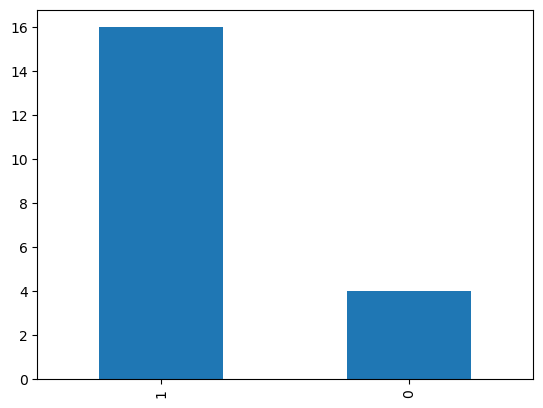

In [ ]:
print(df)

# create a bar graph to show the results of the games
df['winner'].value_counts().plot(kind='bar')


## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function.

In [434]:
# Your code/ answer goes here.

# checks the utility of a board state
def hueristic(board_state, player):
    # check if board is in a terminal state
    is_terminal, result = terminal(board_state)
    if is_terminal:
        return result, is_terminal

    # check if there are any connect 3s for the utility function
    huer_val = 0
    plr_ratio, opp_ratio = check_connect_3(board_state)
    if player == 1:
       huer_val = plr_ratio - opp_ratio
    else:
        huer_val = opp_ratio - plr_ratio

    # prevents a connect 3 from being worth the same as a connect 4
    if(abs(huer_val) == 1):
        huer_val = 0.9 * huer_val

    return huer_val, is_terminal

In [429]:
# def eval_fun(board, player = 1):
    
#     # terminal state?
#     is_terminal, result = terminal(board)
#     if is_terminal: 
#         return result, True
      
#     score = 0
#     board = np.array(board)
#     diagonals = np.array([[board[i][i] for i in range(len(board))], 
#                           [board[i][len(board)-i-1] for i in range(len(board))]])
    
#     for a_board in [board, np.transpose(board), diagonals]:
#         for row in a_board:
#             if sum(row == player) == 2 and any(row ==' '): score += .4
#             if sum(row == (player*-1)) == 2 and any(row ==' '): score -= .4
    
#     return score, False

0


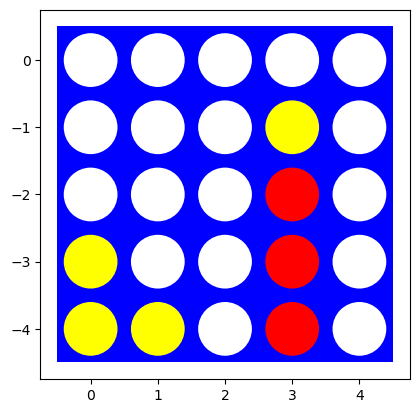

0.9


In [431]:
shape = (6,7)
board = empty_board(shape)
util_val = hueristic(board, 1)
print(util_val)

board3 = [[0, 0, 0, 0, 0],
            [0, 0, 0, -1, 0], 
            [0, 0, 0, 1, 0],
            [-1, 0, 0, 1, 0],
            [-1, -1, 0, 1, 0]]
board = np.array(board3)
visualize(board)
util_val = hueristic(board, 1)
print(util_val)

### Cutting off search [10 points]

Modify your Minimax Search with Alpha-Beta Pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [435]:
# Your code/ answer goes here.

import math

def cutoff_minmax_search(board, player = 1, cutoff = None):
    global DEBUG, COUNT
    COUNT, DEBUG = 0, 0
    COUNT += 1
    plr = player

    # checks each possible column for a move to see if there is terminal state in any 
    for a in action(board):
        is_terminal, result = terminal(results(board, a, plr))
        if is_terminal and result == plr:
            return a

    h_value, next_move = max_val_cut(board, plr, -math.inf, +math.inf, 0, cutoff)
    if DEBUG >= 1: print(f"Nodes searched: {COUNT}")
    return next_move

# players best move
def max_val_cut(state, player, alpha, beta, depth, cutoff):
    #initialize global variables
    global DEBUG, COUNT
    COUNT += 1

    # returns utility and next move as none if it is at a terminal state
    v, is_terminal = hueristic(state, player)
    if DEBUG >= 2: print(f"max: {state} [alpha,beta]=[{alpha},{beta}] v={v}")
    if (cutoff is not None and depth >= cutoff) or is_terminal:
        if is_terminal:
            alpha, beta = v, v
        if DEBUG >= 2: print(f"     found terminal state. backtracking.")
        return v, None
    

    v, move = -math.inf, None

    # check all possible actions in the state, return move with the largest value
    for a in action(state):
        v2, a2 = min_val_cut(results(state, a, player), player, alpha, beta, depth + 1, cutoff)
        if DEBUG >= 2: print(f"max: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")
        if v2 > v:
            v, move = v2, a
            alpha = max(alpha, v)
        if v >= beta:
            if DEBUG >= 2: print(f"     v>=beta ({v}>={beta}): pruning remaining subtree (actions). backtracking.")
            return v, move

    # print("max", v, move)
    return v, move


def min_val_cut(state, player, alpha, beta, depth, cutoff):
    #initialize global variables
    global DEBUG, COUNT
    COUNT += 1

    # returns hueristic utility and next move as none if it is at a terminal state
    v, is_terminal = hueristic(state, player)
    if DEBUG >= 2: print(f"min: {state} [alpha,beta]=[{alpha},{beta}] v={v}")
    if (cutoff is not None and depth >= cutoff) or is_terminal:
        if is_terminal:
            alpha, beta = v, v
        if DEBUG >= 2: print(f"     found terminal state. backtracking.")
        return v, None

    v, move = +math.inf, None

    # check all possible actions in the state, return move with the smallest value
    for a in action(state):
        v2, a2 = max_val_cut(results(state, a, (player * -1)), player, alpha, beta, depth + 1, cutoff)
        if DEBUG >= 2: print(f"min: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")

        if v2 < v:
            v, move = v2, a
            beta = min(beta, v)
        if v <= alpha:
            if DEBUG >= 2: print(f"     v<=alpha ({v}>={alpha}): pruning remaining subtree (actions). backtracking.")
            return v, move
    
    # print("min", v, move)
    return v, move


def cutoff_minmax_player(board, player = 1):
    global DEBUG

    move = cutoff_minmax_search(board, player)
    # for output board for debugging
    if DEBUG >= 0.5: visualize(results(board, move, player))

    return results(board, move, player)


Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

In [442]:
# Your code/ answer goes here.

# five testing boards
board1 = [[0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0], 
          [0, 0, 0, 0, 0],
          [-1, -1, 0, 0, 0],
          [1, 1, 0, 1, -1]]

board2 = [[0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0], 
            [0, 0, 1, -1, 0],
            [0, 1, -1, -1, 0],
            [1, -1, -1, 1, 1]]

board3 = [[0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0], 
            [0, 0, 0, 1, 0],
            [0, 0, 0, 1, 0],
            [-1, -1, 1, -1, 0]]

board4 = [[0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0], 
            [0, 0, 0, 0, 0],
            [1, 1, 1, 0, 0],
            [-1, -1, -1, 0, 0]]


board5 = [[0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0], 
            [-1, 0, 0, 0, 0],
            [-1, 1, 1, 0, 1],
            [-1, -1, -1, 0, 1]]


# change name of board that is assigned to board variable to test different boards
board = np.array(board1)
board = play(board, cutoff_minmax_player, cutoff_minmax_player)
visualize(board)

board = np.array(board2)
board = play(board, cutoff_minmax_player, cutoff_minmax_player)
visualize(board)

board = np.array(board3)
board = play(board, cutoff_minmax_player, cutoff_minmax_player)
visualize(board)

board = np.array(board4)
board = play(board, cutoff_minmax_player, cutoff_minmax_player)
visualize(board)

board = np.array(board5)
board = play(board, cutoff_minmax_player, cutoff_minmax_player)
visualize(board)

TypeError: play() takes 3 positional arguments but 4 were given

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [441]:
# Your code/ answer goes here.

# dataframe to store time results
df = pd.DataFrame(columns=['board_shape', 'time_taken_cutoff_minmax'])

# run the minmax search for increasing board shapes
for x in range(2):
    shape = (4,4+x)
    print(shape)
    board = empty_board(shape)
    board = np.array(board)

    # time how long the minmax search takes and save the time to a dataframe
    start = time.time()
    next_move = cutoff_minmax_player(board, 1)
    end = time.time()

    df = df.append({'board_shape': shape, 'time_taken_ab_minmax': end - start}, ignore_index=True)

print(df)

(4, 4)
(4, 5)


KeyboardInterrupt: 

### Playtime [5 points]

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [ ]:
# Your code/ answer goes here.

## Challenge task [+ 10 bonus point will be awarded separately]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+10 bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above.

In [ ]:
# Your code/ answer goes here.

### Best First Move

Use Oure Monte Carlo Search to determine what the best first move is? Describe under what assumptions this is the "best" first move.  

In [ ]:
# Your code/ answer goes here.